## Part A – Data Preprocessing

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [127]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [128]:
df = df.rename(columns={
    "Luas Tanah (m2)": "Luas Tanah",
    "Luas Bangunan (m2)": "Luas Bangunan",
    "Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan",
    "Harga Penawaran (dari Owner)": "Harga Penawaran"
})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [129]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [130]:
# Check for info dataset
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Area Category       308 non-null    object
 1   Nama Daerah         308 non-null    object
 2   Luas Tanah          308 non-null    int64 
 3   Luas Bangunan       308 non-null    int64 
 4   Jumlah Kamar        308 non-null    int64 
 5   Jumlah Kamar Mandi  308 non-null    int64 
 6   Tingkat/Lantai      308 non-null    int64 
 7   Harga Penawaran     308 non-null    int64 
 8   Terjual/Belum       308 non-null    object
 9   Arah Hadap Rumah    308 non-null    object
 10  Posisi Rumah        308 non-null    object
 11  Lebar Jalan         308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [131]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Area Category':
['Standard' 'Below Standard' 'Sangat Premium' 'Premium']
--------------------
Unique values for column 'Nama Daerah':
['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Tenggilis' 'Wisma Mukti'

In [132]:
# drop kolom "Terjual/Belum" because it has the same value
df = df.drop('Terjual/Belum', axis=1)
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## Part B – Exploratory Data Analysis (15 points)

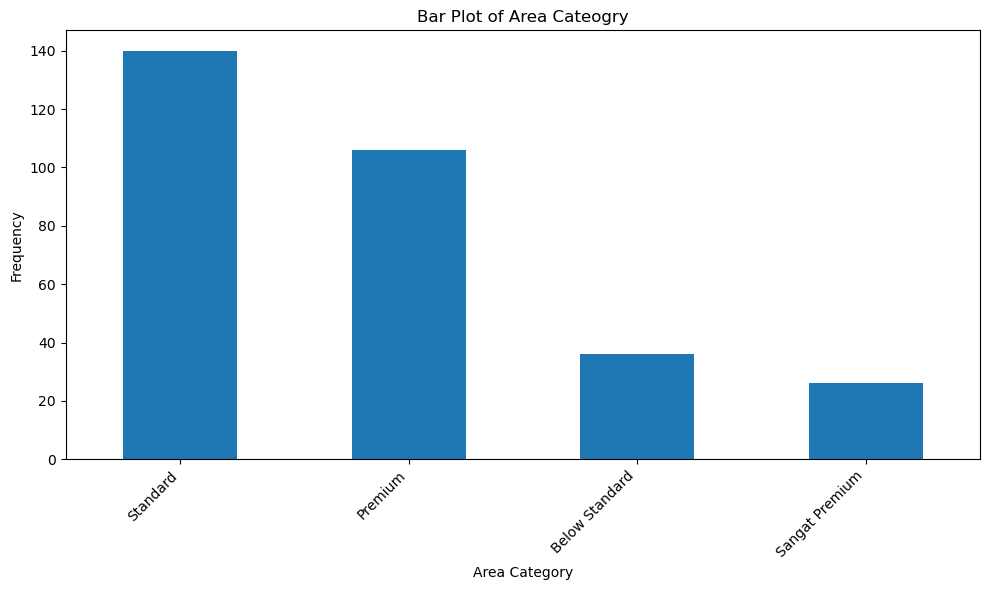

In [133]:
plt.figure(figsize=(10, 6))
df['Area Category'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Area Cateogry')
plt.xlabel('Area Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dari bar chart tersebut, sebagian besar rumah berada di area category standard, diikuti oleh premium. Sedangkan rumah dengan kategori sangat premium paling sedikit.

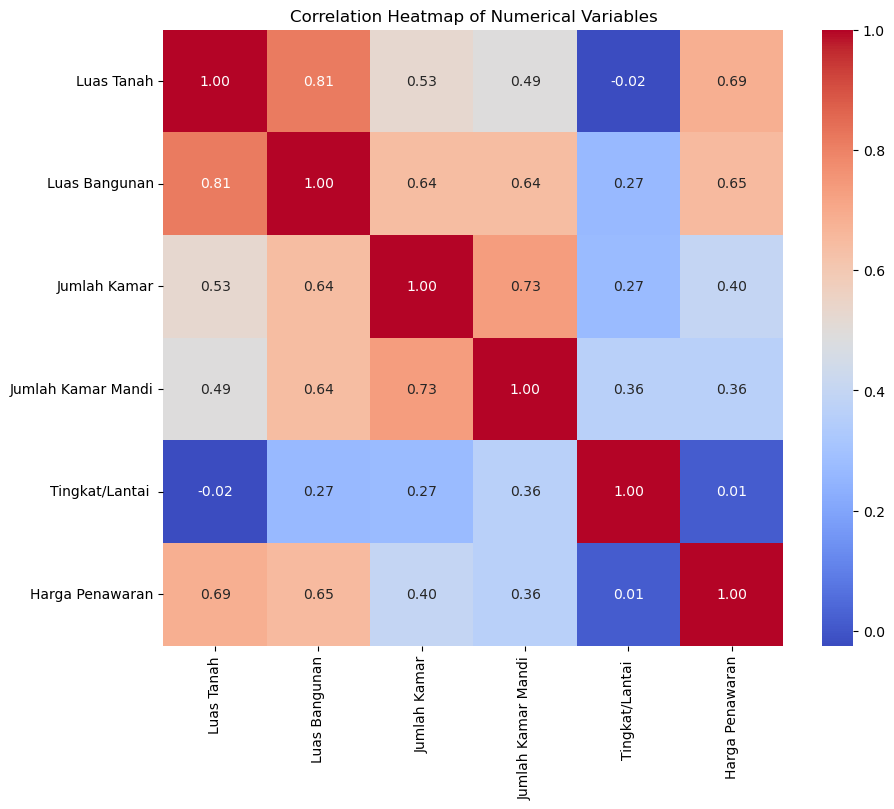

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Dari heatmap tersebut, bisa lihat bahwa beberapa variable dengan korelasi kuat adalah luas tanah dan luas bangunan (0.81), luas bangunan dengan jumlah kamar (0.64) dan jumlah kamar mandi (0.64), serta jumlah kamar dengan jumlah kamar mandi. Contohny seperti rumah dengan tanah lebih luas cenderung punya bangunan lebih besar.

Sedangkan tingkat lantai dengan luas tanah serta tingkat lantai dengan harga penawaran, tidak memiliki korelasi kuat. Bisa dibilang tingkat lantai bukan faktor utama harga penawaran.

## Part C – Data Preparation for Clustering

In [135]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Area Category', 'Nama Daerah',
            'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan']

label_mappings = {}

# Apply label encoding to each categorical column (new encoder per column)
for col in cat_cols:
    le = LabelEncoder()  # <— new encoder for each column
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# ✅ Show encoded DataFrame
print("Encoded DataFrame:")
display(df.head())

# ✅ Show label mappings (category → number)
print("\nLabel Encoding Mappings:")
for col, mapping in label_mappings.items():
    print(f"\n📘 Mapping for '{col}':")
    for k, v in mapping.items():
        print(f"  {k} → {v}")


Encoded DataFrame:


,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan
0,3,11,240,300,4,3,2,3500000000,3,2,0
1,0,100,30,60,2,1,2,287799000,3,2,1
2,3,48,170,170,5,4,2,2699999999,1,0,0
3,2,48,187,250,5,5,2,3100000000,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,2,0



Label Encoding Mappings:

📘 Mapping for 'Area Category':
  Below Standard → 0
  Premium → 1
  Sangat Premium → 2
  Standard → 3

📘 Mapping for 'Nama Daerah':
  Anjasmoro → 0
  Araya → 1
  Asemrowo → 2
  Babatan → 3
  Babatan Pantai → 4
  Baratajaya → 5
  Bendul Merisi → 6
  Bratang Gede → 7
  Bubutan → 8
  Bulak Cumpat barat → 9
  Ciliwung → 10
  Citraland → 11
  Citraland  → 12
  Citraland Golf Avenue → 13
  Citraland Utara → 14
  Darmahusada → 15
  Darmo → 16
  Darmo Permai → 17
  Diponegoro → 18
  Dukuh Pakis → 19
  Dukuh Sutorejo → 20
  Gading → 21
  Gading Indah Regency → 22
  Galaxy Bumi Permai → 23
  Gayungan → 24
  Gayungsari → 25
  Graha → 26
  Graha Famili → 27
  Graha Family → 28
  Greenlake Wonorejo → 29
  Gubeng → 30
  Gunung Anyar Mas → 31
  Gununganyar → 32
  Gununganyar Tambak → 33
  Jambangan → 34
  Jambangan Kebon Agung → 35
  Jelidro Manukan → 36
  Jimerto → 37
  Kalilom → 38
  Kalilom Lor Timur → 39
  Kapas Madya → 40
  Karah → 41
  Karang Asem → 42
  Kartini → 43


In [136]:
# ✅ Show label mappings for reference
print("\nLabel Encoding Mappings:")
for col, mapping in label_mappings.items():
    print(f"\n📘 Mapping for '{col}':")
    for k, v in mapping.items():
        print(f"  {k} → {v}")


Label Encoding Mappings:

📘 Mapping for 'Area Category':
  Below Standard → 0
  Premium → 1
  Sangat Premium → 2
  Standard → 3

📘 Mapping for 'Nama Daerah':
  Anjasmoro → 0
  Araya → 1
  Asemrowo → 2
  Babatan → 3
  Babatan Pantai → 4
  Baratajaya → 5
  Bendul Merisi → 6
  Bratang Gede → 7
  Bubutan → 8
  Bulak Cumpat barat → 9
  Ciliwung → 10
  Citraland → 11
  Citraland  → 12
  Citraland Golf Avenue → 13
  Citraland Utara → 14
  Darmahusada → 15
  Darmo → 16
  Darmo Permai → 17
  Diponegoro → 18
  Dukuh Pakis → 19
  Dukuh Sutorejo → 20
  Gading → 21
  Gading Indah Regency → 22
  Galaxy Bumi Permai → 23
  Gayungan → 24
  Gayungsari → 25
  Graha → 26
  Graha Famili → 27
  Graha Family → 28
  Greenlake Wonorejo → 29
  Gubeng → 30
  Gunung Anyar Mas → 31
  Gununganyar → 32
  Gununganyar Tambak → 33
  Jambangan → 34
  Jambangan Kebon Agung → 35
  Jelidro Manukan → 36
  Jimerto → 37
  Kalilom → 38
  Kalilom Lor Timur → 39
  Kapas Madya → 40
  Karah → 41
  Karang Asem → 42
  Kartini → 43


In [137]:
# List of numeric columns
num_cols = ['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 
            'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']

# Create a new DataFrame with all other (non-numeric) columns
df_cat = df.drop(columns=num_cols)

# Show result
df_cat.head()

,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan
0,3,11,3,2,0
1,0,100,3,2,1
2,3,48,1,0,0
3,2,48,3,2,0
4,1,48,0,2,0


In [138]:
num_cols = ['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 
            'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']

df_num = df[num_cols].copy()
df_num.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,240,300,4,3,2,3500000000
1,30,60,2,1,2,287799000
2,170,170,5,4,2,2699999999
3,187,250,5,5,2,3100000000
4,350,600,5,5,2,5000000000


In [139]:
# Create the scaler
sc = StandardScaler()

# Fit and transform the numerical columns
df_scaled = sc.fit_transform(df_num)

# Convert back to DataFrame (keep the same column names)
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

# Show result
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [140]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


In [141]:
df_scaled = pd.concat([df_scaled, df_cat], axis=1)

# Check result
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,3,11,3,2,0
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0,100,3,2,1
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,3,48,1,0,0
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,2,48,3,2,0
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,1,48,0,2,0


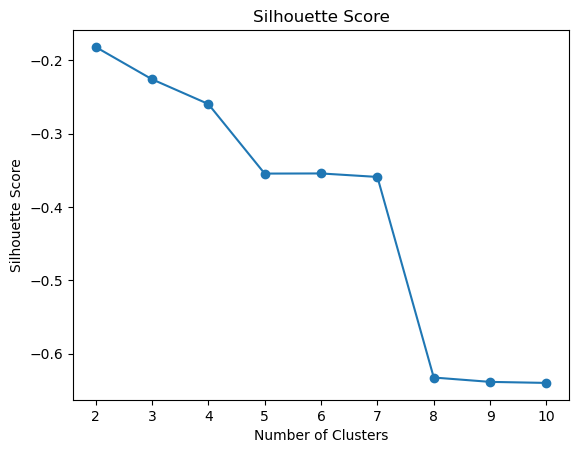

In [142]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

#tentuin sndr rangenya (mau brp k)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


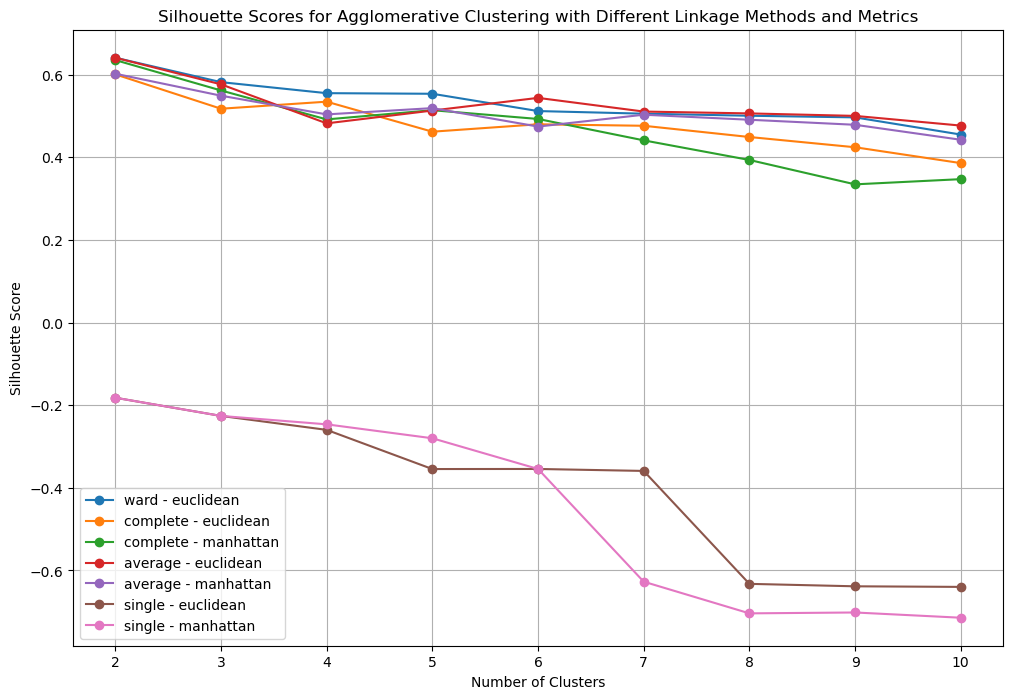

Best Silhouette Score: 0.6409577657640738
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [143]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)

#linkage - jarak antar clusternya
linkage_methods = ['ward', 'complete', 'average', 'single']

# metric (Euclidean) - jarak antar data points, 1 titik ke titik lain
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # khusus WARD, ga bisa dipake bareng manhattan
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Part D – Hierarchical Clustering Modeling

Model 1

Build two hierarchical clustering models:
○ Model 1: Using the best combination of parameters from Part C
○ Model 2: Using Ward linkage with the same number of clusters (n_clusters)

- The best combination is ward too so I build one model with linkage ward (best) and another with linkage average (second best based on what i see from the chart)

In [144]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [157]:
# Hierarchical Clustering
agglo2 = AgglomerativeClustering(n_clusters=2, linkage='average', metric=best_metric)
y_hc2 = agglo2.fit_predict(df_scaled)

In [146]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.6409577657640738


In [158]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc2)
print(ss)

0.6409577657640738


We can see that the evaluation result of linkage using "ward"  and "average" with the same n cluster resulted in the same silhouette score.

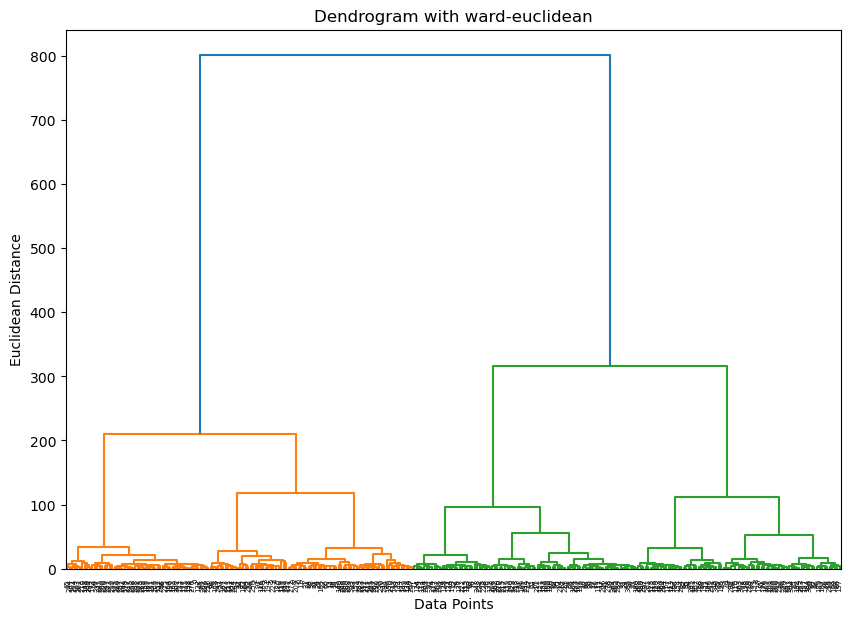

In [148]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

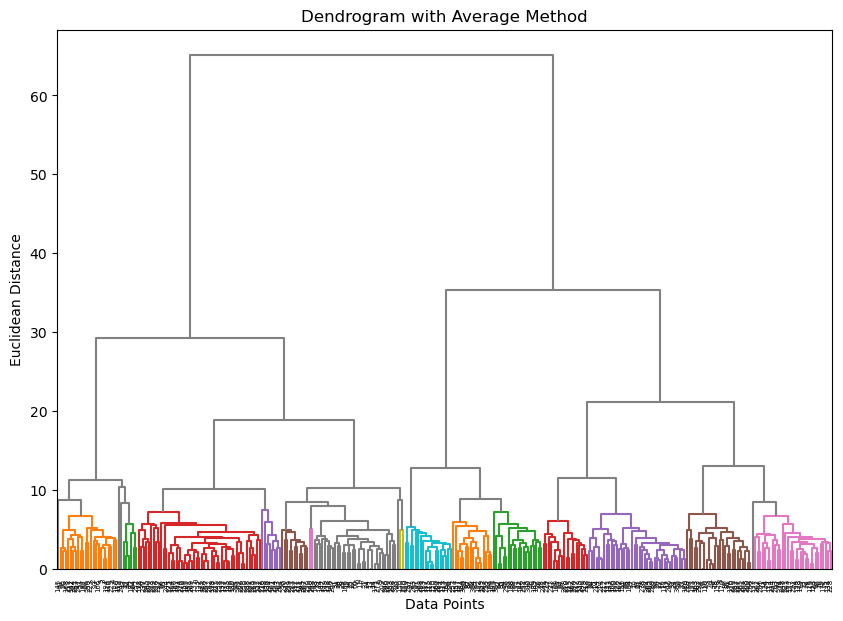

In [149]:
# Ward Method
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [150]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan,Agglo
0,3,11,240,300,4,3,2,3500000000,3,2,0,1
1,0,100,30,60,2,1,2,287799000,3,2,1,0
2,3,48,170,170,5,4,2,2699999999,1,0,0,1
3,2,48,187,250,5,5,2,3100000000,3,2,0,1
4,1,48,350,600,5,5,2,5000000000,0,2,0,1


## Part E – Comparison & Interpretation

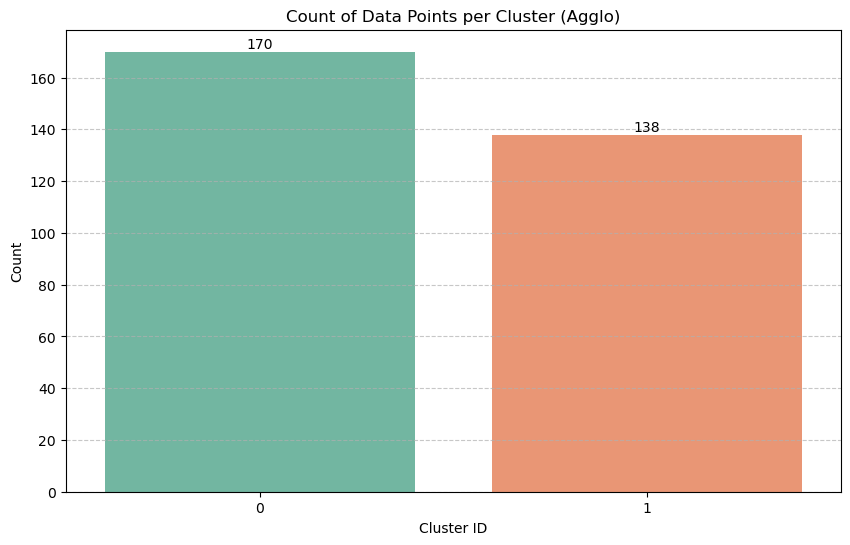

In [151]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

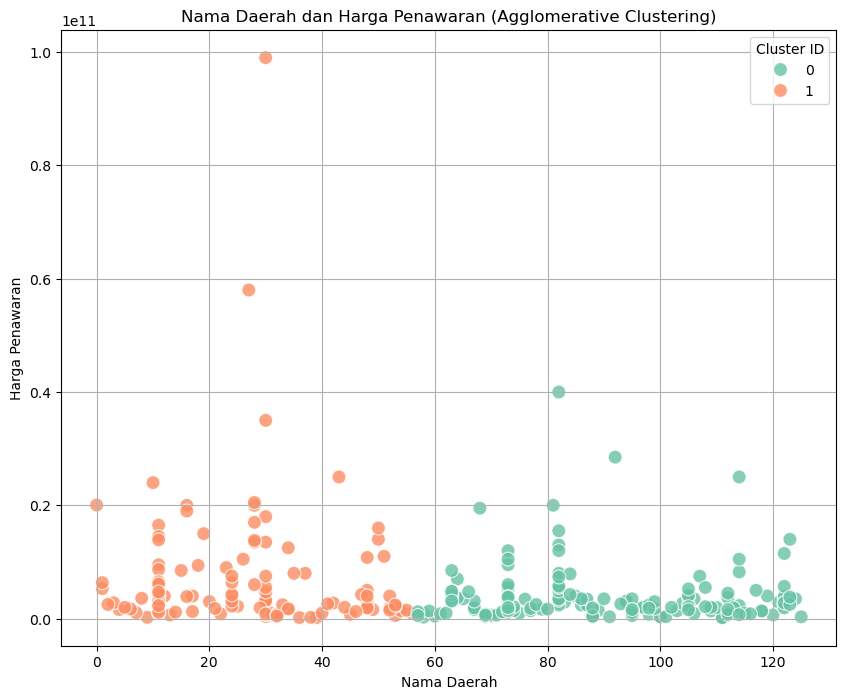

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Nama Daerah', y='Harga Penawaran', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Nama Daerah dan Harga Penawaran (Agglomerative Clustering)')
plt.xlabel('Nama Daerah')
plt.ylabel('Harga Penawaran')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [153]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Nama Daerah'
y_col = 'Harga Penawaran'
z_col = 'Lebar Jalan'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [154]:
# Create a cluster summary with descriptive statistics
cluster_summary = df.groupby('Agglo').agg({
    'Area Category': ['first', 'count'],  # categorical — show first (or mode) and count
    'Nama Daerah': ['first'],
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
    'Arah Hadap Rumah': ['first'],
    'Posisi Rumah': ['first'],
    'Lebar Jalan': ['first']
})

# Rename <lambda> or 'first' to something meaningful like 'mode'
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('Cluster')

cluster_summary


Area Category       Nama Daerah  Luas Tanah                        \
                 mode count        mode        mean         std min   max   
Cluster                                                                     
0                   0   170         100  200.452941  176.401876  16   972   
1                   3   138          11  259.594203  225.708928  14  1561   

        Luas Bangunan                  ... Tingkat/Lantai           \
                 mean         std min  ...             std min max   
Cluster                                ...                           
0          227.505882  166.985215  16  ...        0.486826   1   3   
1          314.956522  251.339793  14  ...        0.534240   1   4   

        Harga Penawaran                                        \
                   mean           std        min          max   
Cluster                                                         
0          3.814940e+09  5.020656e+09  160000000  39999990000   
1          6.491776e+09  1.094171e+10  180000000  99000000000   

        Arah Hadap Rumah Posisi Rumah Lebar Jalan  
                    mode         mode        mode  
Cluster                                            
0                      3            2           1  
1                      3            2           0  

[2 rows x 30 columns]

### Managerial interpretation and potential business implications

Cluster 0 (n=170) — Rumah Standard, Harga Menengah, Lokasi Pinggiran

Profil:
Umumnya berada di kategori area below standard dengan lokasi seperti Setro Baru Utara dengan harga penawaran rata-rata 3,8 miliar.
Memiliki luas tanah sekitar 200m², 1–3 lantai, serta posisi rumah standard dengan lebar jalan untuk kurang dari 1 mobil
Sebagian besar menghadap utara.

Makna:
Pasar keluarga muda dan profesional menengah yang tidak masalah dengan lokasi ruma di area pinggiran dengan harga masih terjangkau.

Strategi:
Tawarkan paket pembelian dengan KPR ringan atau promo cicilan tetap.
Fokus pada keamanan, akses transportasi, dan fasilitas keluarga (sekolah, taman, minimarket).
Gunakan iklan digital dan platform properti online untuk menarik generasi muda pekerja.
Kolaborasi dengan bank untuk simulasi pembiayaan transparan.

Fokus KPI:
Conversion rate listing → visit, rata-rata waktu penjualan, tingkat pembelian melalui KPR.

----------

Cluster 1 (n=138) — Rumah Premium, Harga Tinggi, Lokasi Strategis

Profil:
Umumnya termasuk area kategori standard seperti Citraland dengan harga penawaran rata-rata 6,5 miliar.
Memiliki lrata-rata luas tanah besar sebesar 259, bangunan luas dan bertingkat hingga 4 lantai, serta posisi rumah standard dengan jalan lebar yang muat 1-2 mobil.


Makna:
Orang kelas menengah atas dan investor properti yang mencari lokasi premium dan nilai investasi tinggi.
Pembeli di cluster ini lebih mementingkan prestige dan kenyamanan hidup daripada harga.

Strategi:
Tawarkan layanan eksklusif seperti private viewing, paket interior premium, atau kerja sama developer dengan arsitek ternama.
Gunakan pendekatan CRM (Customer Relationship Management) untuk menjaga hubungan jangka panjang.
Fokus pada strategi word-of-mouth, pameran properti eksklusif, dan promosi di majalah atau media high-end.
Sediakan program loyalitas investor seperti cashback untuk pembelian properti kedua.

Fokus KPI:
Nilai transaksi rata-rata (AOV), tingkat referral, dan margin profit per properti.

------------

Rekomendasi Umum

Segmentasi Produk:

Cluster 0 → Produk rumah siap huni dengan nilai investasi jangka menengah.

Cluster 1 → Produk rumah eksklusif, investasi properti jangka panjang dengan nilai prestise tinggi.

Strategi Harga & Promosi:

Cluster 0: Promosi berbasis diskon dan fleksibilitas pembayaran (KPR, cicilan).

Cluster 1: Promosi berbasis nilai tambah seperti desain, lokasi, dan layanan after-sales.

Strategi Komunikasi:

Cluster 0: Gunakan media sosial, situs properti, dan iklan digital (Instagram Ads, Rumah123, OLX).

Cluster 1: Gunakan pendekatan personal, event eksklusif seperti di mall, dan komunikasi melalui agen properti profesional.

Monitoring:

Evaluasi segmentasi tiap 6 bulan untuk menyesuaikan perubahan tren pasar properti.

Analisis perpindahan preferensi pembeli dari cluster 0 ke cluster 1 sebagai indikator peningkatan daya beli.